In [1]:
%matplotlib inline
from astropy import constants as const
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import AutoMinorLocator,MultipleLocator,ScalarFormatter
from glob import glob
import numpy as np
import pandas as pd
import re

In [2]:
# Set up for plotting
bfsize=22
plt.rc('font',family='times')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['figure.figsize'] = (8,5.5)
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelsize'] = bfsize
plt.rcParams['axes.labelpad'] = 1.0
plt.rcParams['axes.labelweight'] = 600 # 400 is normal, 700 is bold
plt.rcParams['xtick.major.width'] = 1.4
plt.rcParams['ytick.major.width'] = 1.4
plt.rcParams['xtick.major.size'] = 0.3*bfsize
plt.rcParams['ytick.major.size'] = 0.3*bfsize
plt.rcParams['xtick.minor.width'] = 1.0
plt.rcParams['ytick.minor.width'] = 1.0
plt.rcParams['xtick.minor.size'] = 0.19*bfsize
plt.rcParams['ytick.minor.size'] = 0.19*bfsize
plt.rcParams['xtick.labelsize'] = 1.0*bfsize
plt.rcParams['ytick.labelsize'] = 1.0*bfsize
plt.rcParams['xtick.major.pad'] = 0.155*bfsize
plt.rcParams['ytick.major.pad'] = 0.155*bfsize
plt.rcParams['xtick.minor.pad'] = 0.155*bfsize
plt.rcParams['ytick.minor.pad'] = 0.155*bfsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = 'True'
plt.rcParams['ytick.right'] = 'True'
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.scatterpoints'] = 1
plt.rcParams['legend.fancybox'] = 'True'
plt.rcParams['legend.fontsize'] = 1.1*bfsize
plt.rcParams['legend.labelspacing'] = 0.25
plt.rcParams['legend.handletextpad'] = 0.35
plt.rcParams['legend.borderpad'] = 0.45
plt.rcParams['legend.borderaxespad'] = 0.4
plt.rcParams['legend.columnspacing'] = 0.2
plt.rcParams['legend.frameon'] = 'True'
plt.rcParams['legend.edgecolor'] = 'black'

In [3]:
# My colours (should be better for colour-blind)
myc={'violet':'#6E36BB','blue':'#2480D0','cyan':'#00E6E6','green':'#44AB5E',
     'orange':'#FF6600','red':'#DD082C','black':'#000000','grey':'#d0d0d0'}

# Solar parameters
Sun = {'Teff':5768, 'FeH':0.0, 'logg':4.43}

# Read in data files

In [4]:
# Read in SP1 star names
sinfo = pd.read_csv('SP1_Sample.csv',comment='#')
snames = list(sinfo['Object'])
# Remove HD1835 because it has much larger uncertainties than other stars
snames.remove('HD1835')

# Read in transition pair data
pairs = pd.read_csv('transition_pairs.csv',comment='#',dtype={'lambda1':str,'lambda2':str})
pairs['name'] = pairs['ion1']+pairs['lambda1']+'_'+pairs['ion2']+pairs['lambda2']
pairs['dQ'] = pairs['q2']/pairs['omega2'] - pairs['q1']/pairs['omega1']
pairs['edQ'] = np.sqrt(np.square(pairs['dq2']/pairs['omega2']) + np.square(pairs['dq1']/pairs['omega1']))

# Make a big dataframe with all results by reading in pair results files
dflist = []
for i in range(0,len(pairs)):
    globstr = pairs['lambda1'][i]+pairs['ion1'][i].replace('II','2').replace('I','1') + '_' + \
                pairs['lambda2'][i]+pairs['ion2'][i].replace('II','2').replace('I','1') + \
                '_*_pair_separations_*.csv'
    for file in glob(globstr):
        df = pd.read_csv(file,comment='#')
        df['order'] = re.split('_|\.csv',file)[2]
        df['fibre_epoch'] = re.split('_|\.csv',file)[5]
        for key in pairs.keys():
            df['pair_'+key] = pairs[key][i]
        dflist.append(df)
df_all = pd.concat(dflist)

In [5]:
df_all

,star_name,Nobs,model_offset_pair,err_stat_pair,err_sys_pair,chisq_nu_pair,offset_transition1,t_stat_err1,t_sys_err1,chisq_nu1,...,pair_q1,pair_dq1,pair_lambda2,pair_omega2,pair_ion2,pair_q2,pair_dq2,pair_name,pair_dQ,pair_edQ
0,HD10180,22,1.193763,6.287901,6.501506,1.099475,10.973372,4.117012,8.936777,1.533108,...,490,60,4653.460,21489.386,CrI,490,60,CrI4652.593_CrI4653.460,0.000004,0.003948
1,HD102117,5,-9.001328,10.140743,6.501506,0.417515,10.244686,5.281174,8.936777,2.251516,...,490,60,4653.460,21489.386,CrI,490,60,CrI4652.593_CrI4653.460,0.000004,0.003948
2,HD102438,33,7.472888,3.287818,6.501506,0.607454,6.442083,1.967142,8.936777,1.344502,...,490,60,4653.460,21489.386,CrI,490,60,CrI4652.593_CrI4653.460,0.000004,0.003948
3,HD104982,1,-4.436908,24.342253,6.501506,NaN,18.983300,16.928302,8.936777,NaN,...,490,60,4653.460,21489.386,CrI,490,60,CrI4652.593_CrI4653.460,0.000004,0.003948
4,HD106116,8,-3.940417,7.958935,6.501506,0.404263,-3.974152,5.170261,8.936777,1.412900,...,490,60,4653.460,21489.386,CrI,490,60,CrI4652.593_CrI4653.460,0.000004,0.003948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,HD97037,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1300,900,6244.834,16013.236,VI,-600,60,FeI6242.372_VI6244.834,0.043682,0.056306
126,HD97343,7,0.283025,6.998342,0.000000,0.794634,0.708477,4.248483,2.863880,0.468531,...,-1300,900,6244.834,16013.236,VI,-600,60,FeI6242.372_VI6244.834,0.043682,0.056306
127,HD9782,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1300,900,6244.834,16013.236,VI,-600,60,FeI6242.372_VI6244.834,0.043682,0.056306
128,HD98281,7,-2.715998,7.927592,0.000000,0.574998,4.579140,4.374947,2.863880,0.663484,...,-1300,900,6244.834,16013.236,VI,-600,60,FeI6242.372_VI6244.834,0.043682,0.056306


# Weighted mean separation offset for each pair in each star

In [6]:
sp = {'sname':[], 'pname':[], 'dv':[], 'edv_stat':[], 'edv_s2s':[], 'dQ':[], 'edQ':[]}
for sname in snames:
    for pname in pairs['name']:
        filt = (df_all['star_name'] == sname) & (df_all['pair_name'] == pname) &\
                pd.notna(df_all['model_offset_pair']) & pd.notna(df_all['err_stat_pair'])
        dv, edv_stat = df_all['model_offset_pair'][filt], df_all['err_stat_pair'][filt]
        if len(dv) > 0:
            sp['sname'].append(sname)
            sp['pname'].append(pname)
            sdv, swgt = np.average(dv,weights=1/np.square(edv_stat),returned=True)
            sp['dv'].append(sdv)
            sp['edv_stat'].append(1/np.sqrt(swgt))
            sp['edv_s2s'].append(df_all['err_sys_pair'][filt].values[0])
            sp['dQ'].append(df_all['pair_dQ'][filt].values[0])
            sp['edQ'].append(df_all['pair_edQ'][filt].values[0])
df_sp = pd.DataFrame(sp)

In [7]:
df_sp

,sname,pname,dv,edv_stat,edv_s2s,dQ,edQ
0,Vesta,CrI4652.593_CrI4653.460,-8.866214,5.001645,6.501506,0.000004,0.003948
1,Vesta,TiI4759.449_TiI4760.600,-2.220898,8.018292,1.483020,0.000957,0.004039
2,Vesta,TiII4799.873_FeI4800.072,6.781758,9.455377,7.471390,-0.044160,0.019680
3,Vesta,NiI5138.510_FeI5143.171,-13.648614,4.784647,10.482466,-0.108290,0.029970
4,Vesta,TiII5187.346_FeI5200.158,2.738846,5.426361,5.546314,-0.095639,0.047444
...,...,...,...,...,...,...,...
272,HD222582,NaI6162.452_CaI6168.150,-5.306678,34.471043,8.465421,-0.028621,0.001482
273,HD222582,NaI6162.452_FeI6175.044,-5.447552,33.325472,9.601636,0.027231,0.030875
274,HD222582,CaI6168.150_FeI6175.044,0.171816,24.919685,5.996418,0.055851,0.030911
275,HD222582,NiI6192.900_FeI6202.028,52.743397,28.752817,12.981110,-0.162611,0.046063


# Weighted mean $\Delta\alpha/\alpha$ distribution for each star

In [8]:
s = {}
Nsim = 100000
for sname in snames:
    filt = df_sp['sname'] == sname
    v, ev_stat, ev_s2s = df_sp['dv'][filt], df_sp['edv_stat'][filt], df_sp['edv_s2s'][filt]
    Q, eQ = df_sp['dQ'][filt], df_sp['edQ'][filt]
    # Calculate distribution using all error terms
    vtot = np.random.normal(v, np.sqrt(np.square(ev_stat)+np.square(ev_s2s)), size = (Nsim,len(v)))
    coeff = -2.0 * const.c.value * np.random.uniform(Q-eQ, Q+eQ, size = (Nsim,len(Q)))
    da = vtot / coeff
    eda = np.tile(np.sqrt(np.square(ev_stat) + np.square(ev_s2s)), (Nsim,1)) / np.abs(coeff)
    wmda = 1.e9 * np.average(da, axis=1, weights=1/np.square(eda))
    mwmda, swmda = np.mean(wmda), np.std(wmda)
    s[sname] = {'da':wmda, 'mda':mwmda, 'emda':swmda}
    # Calculate distribution without Q uncertainties
    coeff = -2.0 * const.c.value * np.tile(Q, (Nsim,1))
    da = vtot / coeff
    eda = np.tile(np.sqrt(np.square(ev_stat) + np.square(ev_s2s)), (Nsim,1)) / np.abs(coeff)
    wmda = 1.e9 * np.average(da, axis=1, weights=1/np.square(eda))
    mwmda, swmda = np.mean(wmda), np.std(wmda)
    s[sname].update({'da_stat+s2s':wmda, 'mda_stat+s2s':mwmda, 'emda_stat+s2s':swmda})
    # Calculate distribution without Q and s2s uncertainties
    vtot = np.random.normal(v, ev_stat, size = (Nsim,len(v)))
    da = vtot / coeff
    eda = np.tile(ev_stat, (Nsim,1)) / np.abs(coeff)
    wmda = 1.e9 * np.average(da, axis=1, weights=1/np.square(eda))
    mwmda, swmda = np.mean(wmda), np.std(wmda)
    s[sname].update({'da_stat':wmda, 'mda_stat':mwmda, 'emda_stat':swmda})
    # Calculate contributions from s2s and Q errors
    emda_Q, emda_s2s = 0.0, 0.0
    if s[sname]['emda_stat+s2s'] < s[sname]['emda']:
        emda_Q = np.sqrt(np.square(s[sname]['emda']) - np.square(s[sname]['emda_stat+s2s']))
    if s[sname]['emda_stat'] < s[sname]['emda_stat+s2s']:
        emda_s2s = np.sqrt(np.square(s[sname]['emda_stat+s2s']) - np.square(s[sname]['emda_stat']))
    s[sname].update({'emda_Q':emda_Q, 'emda_s2s':emda_s2s})
df_s = pd.DataFrame(s)

In [9]:
df_s

,Vesta,HD19467,HD20782,HD30495,HD45184,HD45289,HD76151,HD78429,HD78660,HD138573,HD140538,HD146233,HD157347,HD171665,HD183658,HD220507,HD222582
da,"[73.87441853026586, 14.506436322703928, 19.236...","[36.709376099399904, 109.55452931944689, 12.94...","[104.27303037228377, 44.59362751366626, 78.331...","[-35.130554732051195, -98.72776622879684, 247....","[108.98336593312855, 116.1124844456282, 88.564...","[97.25860681717292, 12.063486784754357, 38.533...","[-26.85063255911178, -12.748883766487246, -96....","[-133.57816382076808, -40.01190114461385, -0.3...","[-193.89201102209702, -447.79955614759456, -26...","[19.23608119894601, -267.46886722090534, -76.3...","[44.63622921939526, -67.7094278817843, -41.904...","[81.46830190326186, 26.886322337443374, 12.928...","[-48.231853300492595, 0.4212569260390298, -78....","[56.93881009326307, 139.03640952610158, 11.743...","[143.32813393840087, 141.22646846284871, 8.432...","[229.1502146463667, 255.52749572042194, 195.46...","[-43.306742532207124, -37.78517437140412, 21.9..."
mda,55.2998,58.0452,48.417,-79.6751,103.204,99.8603,-65.5134,-14.4452,-241.259,-33.551,-25.1046,30.1783,-8.05894,39.8511,80.1697,196.152,67.538
emda,46.8973,58.628,46.2072,233.073,44.7936,45.9907,50.9014,37.7177,116.004,96.6157,47.9363,33.3214,42.583,70.2118,108.626,54.6076,141.394
da_stat+s2s,"[93.26890380596952, 12.959068694971489, 20.175...","[32.1852783245394, 129.95491136100065, 12.5812...","[102.54420151807186, 57.65129173927788, 62.519...","[27.517090501560215, -132.62926851335052, 225....","[136.1946506688002, 97.21177706791023, 81.8174...","[113.99452522534598, 25.779711484441936, 45.88...","[-19.051976120077796, -5.543454897854172, -86....","[-145.60298860359026, -61.33420339131271, 0.54...","[-185.15915443831165, -436.39430408396487, -26...","[19.614384449965268, -215.14461805533548, -91....","[49.746549450521805, -78.76275764290685, -53.1...","[78.7860331872328, 29.460973986755427, 9.40794...","[-21.86583878636551, 14.490404277560152, -63.5...","[82.88982354259345, 144.9311274293967, 15.3519...","[194.49739717710898, 149.63647225363712, 29.54...","[275.40166632818386, 201.92489008553724, 226.5...","[-30.610358906494305, -5.60776686988562, -5.29..."
mda_stat+s2s,57.6297,59.5915,50.6762,-77.6635,109.775,103.986,-68.9063,-15.5235,-247.651,-34.1978,-26.2925,32.9123,-8.28721,41.536,83.3449,202.761,69.6578
emda_stat+s2s,47.3165,58.4369,45.9245,227.931,35.1633,45.6861,48.4799,38.1394,115.238,96.4798,48.3671,33.4945,42.049,68.9021,107.254,49.9488,141.481
da_stat,"[69.67574077567403, 26.93812758554076, 90.5568...","[-15.852923592917413, -14.781925701170495, 23....","[-6.1499112021329765, -4.201205616043242, -19....","[-398.306928808618, 76.34662696857791, -287.58...","[170.42546743423674, 166.93791691528716, 178.5...","[114.33443219098312, 110.38268747447692, 96.91...","[-82.638181283839, -104.99970632022467, -40.45...","[-23.275181231687895, -41.6413886228616, -40.9...","[-70.77535345109493, -175.5171359412325, -226....","[-87.64344519394295, -35.525088229236914, 13.1...","[-36.388600990312696, -98.29945148647646, -108...","[9.590315602293664, 7.378544832310466, -6.5809...","[0.7644954519568402, 17.269188927737222, 28.13...","[19.272267097140485, 138.48907299581106, 91.58...","[79.69349333872835, -72.287333633967, 166.8712...","[241.14269167922563, 216.28062949833625, 255.0...","[32.73746320364081, -15.339839067204222, 263.4..."
mda_stat,40.4511,56.5446,11.1157,-45.5286,171.762,120.246,-98.4278,-39.4997,-246.795,-43.9101,-59.9612,0.833394,21.2484,53.1748,75.7089,231.344,79.5963
emda_stat,25.1943,42.572,25.7818,209.336,8.76927,22.4742,27.0942,15.164,104.548,87.7762,26.8349,7.6112,21.1791,54.5336,80.07,31.9558,133.689
emda_Q,0,4.72956,5.10333,48.687,27.7491,5.28441,15.5133,0,13.3106,5.12222,0,0,6.72261,13.4981,17.2153,22.0706,0


# Weighted mean separation offset for each transition pair

In [10]:
p = {}
for pname in pairs['name']:
    filt = df_sp['pname'] == pname
    v, ev_stat, ev_s2s = df_sp['dv'][filt], df_sp['edv_stat'][filt], df_sp['edv_s2s'][filt]
    # Calculate weighted mean using all statistical and star-to-star terms
    ev2 = np.square(ev_stat) + np.square(ev_s2s)
    wmv, swgt = np.average(v, weights=1/ev2, returned=True)
    ewmv = 1/np.sqrt(swgt)
    p[pname] = {'dv':wmv, 'edv':ewmv}
    # Calculate weighted mean using statistical error only
    ev2 = ev_stat
    wmv, swgt = np.average(v, weights=1/ev2, returned=True)
    ewmv = 1/np.sqrt(swgt)
    p[pname].update({'dv_stat':wmv, 'edv_stat':ewmv})
    # Calculate systematic error contribution to uncertainty
    p[pname].update({'dv_sys':np.sqrt(np.square(p[pname]['edv']) - np.square(p[pname]['edv_stat']))})
df_p = pd.DataFrame(p)

In [11]:
df_p

,CrI4652.593_CrI4653.460,TiI4759.449_TiI4760.600,TiII4799.873_FeI4800.072,NiI5138.510_FeI5143.171,TiII5187.346_FeI5200.158,CaI6123.910_FeI6138.313,CaI6123.910_FeI6139.390,FeI6138.313_FeI6139.390,FeI6153.320_NaI6155.928,FeI6153.320_NaI6162.452,FeI6153.320_CaI6168.150,NaI6155.928_NaI6162.452,NaI6162.452_CaI6168.150,NaI6162.452_FeI6175.044,CaI6168.150_FeI6175.044,NiI6192.900_FeI6202.028,FeI6242.372_VI6244.834
dv,-3.804362,1.456316,2.335615,-0.436363,0.827467,-5.385811,-5.920878,2.349752,2.487913,-0.135951,3.144709,-2.440024,3.870744,0.832054,-2.738980,3.176583,-0.782259
edv,2.178829,1.405390,1.540148,3.225446,1.658235,2.804509,2.642033,1.177291,3.836367,3.365997,2.437861,2.378189,3.058658,3.238466,2.213992,3.451322,4.295931
dv_stat,-2.811934,2.511141,3.458391,-1.351668,0.810856,-7.609497,-6.734163,1.674186,2.215712,-1.186052,2.005174,-3.498438,3.878367,1.358404,-2.130798,2.153015,-1.134005
edv_stat,0.509204,0.623931,0.676586,0.525467,0.540296,0.564476,0.562309,0.593540,0.842904,0.703923,0.626838,0.854277,0.661022,0.648174,0.544783,0.572033,0.751375
dv_sys,2.118492,1.259298,1.383578,3.182355,1.567745,2.747114,2.581501,1.016723,3.742622,3.291569,2.355895,2.219458,2.986375,3.172937,2.145920,3.403586,4.229712


# Plots of $\Delta\alpha/\alpha$ distribution for selected star

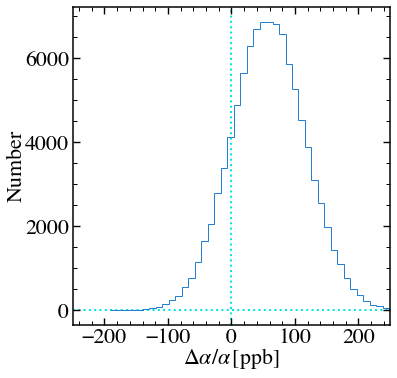

In [12]:
fig = plt.figure(figsize=(4.5,4.5))

#sname = 'Vesta'
sname = 'HD19467'

da = df_s[sname]['da']

xmin, xmax = -250.0, 250.0
xrng = xmax - xmin

ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)

N, _, __ = ax1.hist(da,bins=50,histtype='step',align='mid',color=myc['blue'],label=sname)
ymin, ymax = 0.0, np.max(N)
yrng = ymax - ymin
ymin, ymax = ymin - 0.05 * yrng, ymax + 0.05 * yrng
ax1.vlines([0.0],ymin,ymax,colors=myc['cyan'],linestyles=[':'],linewidths=2.0,zorder=1)
ax1.hlines([0.0],xmin,xmax,colors=myc['cyan'],linestyles=[':'],linewidths=2.0,zorder=1)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'$\Delta\alpha/\alpha\,$[ppb]',labelpad=-2,fontsize=bfsize)
ax1.set_ylabel(r'Number',labelpad=-2,fontsize=bfsize)
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
#ax1.yaxis.set_major_locator(MultipleLocator(1))
#ax1.yaxis.set_minor_locator(AutoMinorLocator(0))

plt.minorticks_on()
fig.subplots_adjust(left=0.01,right=0.99,bottom=0.01,top=0.99,wspace=0.0,hspace=0.0)

# Export to PDF
#plt.savefig('da_SP1.pdf',bbox_inches='tight',pad_inches=0.02)

# Plot of $\Delta\alpha/\alpha$ for all stars

da/a = 33.39 +/- 4.62(stat) +/- 12.02(sys) (12.88 tot), chisqnu = 1.77 (28.29, 16)


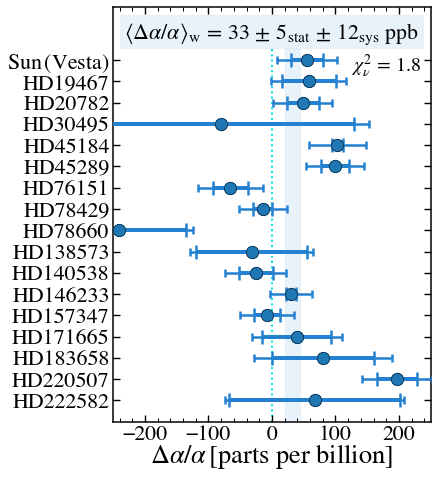

In [27]:
fig = plt.figure(figsize=(4.5,6.0))

x, ex, ex_stat = df_s.loc['mda'], df_s.loc['emda'], df_s.loc['emda_stat']
# Compute weighted mean over stars
wmx, swgt = np.average(x,weights=1/np.square(ex),returned=True)
ewmx = 1/np.sqrt(swgt)
_, swgt = np.average(x,weights=1/np.square(ex_stat),returned=True)
ewmx_stat = 1/np.sqrt(swgt)
ewmx_sys = np.sqrt(np.square(ewmx) - np.square(ewmx_stat))
# Compute chisq
chisq = np.sum(np.square(x-wmx)/np.square(ex))
chisqnu = chisq / (len(x) - 1.0)
print('da/a = {:.2f} +/- {:.2f}(stat) +/- {:.2f}(sys) ({:.2f} tot), chisqnu = {:.2f} ({:.2f}, {:d})'.format(
    wmx,ewmx_stat,ewmx_sys,ewmx,chisqnu,chisq,len(x)-1))

y = np.arange(len(snames),0,-1)
xmin, xmax = -250.0,250.0
xrng = xmax - xmin
ymin, ymax = 0, y[0] + 2.5
yrng = ymax - ymin

ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)

plt.yticks(y,[re.sub('Vesta','Sun$\,$(Vesta)',sname) for sname in snames],rotation=0)

ax1.vlines([0.0],ymin,ymax-2.0,colors=myc['cyan'],linestyles=[':'],linewidths=2.0,zorder=1)
ax1.fill_between([wmx-ewmx,wmx+ewmx],[ymax-2.0]*2,[ymin]*2,lw=0.2,facecolor=myc['blue'],
                 edgecolor=myc['blue'],alpha=0.10,zorder=1)
ax1.fill_between([xmin+0.02*xrng,xmax-0.02*xrng],[ymax-0.4]*2,[ymax-2.0]*2,lw=0.2,facecolor=myc['blue'],
                 edgecolor=myc['blue'],alpha=0.10,zorder=1)
ax1.errorbar(x,y,xerr=ex_stat,fmt='',ls='none',color=myc['blue'],alpha=1.0,elinewidth=4.0,
             capsize=7.0,mew=2.5,zorder=100)
ax1.errorbar(x,y,xerr=ex,fmt='',ls='none',color=myc['blue'],alpha=1.0,elinewidth=2.5,
             capsize=4.0,mew=2.5,zorder=100)
ax1.scatter(x,y,marker='o',s=150.0,c=myc['blue'],alpha=1.0,zorder=101)
ax1.scatter(x,y,marker='o',s=150.0,facecolors=None,edgecolors='black',linewidths=0.5,alpha=1.0,zorder=102)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'$\Delta\alpha/\alpha\,$[parts per billion]',labelpad=-2,fontsize=1.2*bfsize)
annot = r'${:.0f}\,\pm\,{:.0f}_\mathrm{{stat}}\,\pm\,{:.0f}_\mathrm{{sys}}$ ppb'.format(wmx,ewmx_stat,ewmx_sys)
ax1.annotate(r'$\left<\Delta\alpha/\alpha\right>_\mathrm{w}\,=\,$'+annot,xy=(0.5,0.965),
             xycoords='axes fraction',ha='center',va='top',fontsize=1.0*bfsize)
ax1.annotate(r'$\chi^2_\nu\,=\,{:.1f}$'.format(chisqnu),xy=(0.97,0.89),
             xycoords='axes fraction',ha='right',va='top',fontsize=0.9*bfsize)
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
#plt.minorticks_on()
fig.subplots_adjust(left=0.01,right=0.99,bottom=0.02,top=0.98,wspace=0.0,hspace=0.0)

# Export to PDF
#plt.savefig('da_stars.pdf',bbox_inches='tight',pad_inches=0.02)

In [28]:
snames = np.array(snames)
shifted = np.array(['Vesta','HD20782','HD45184','HD45289','HD76151','HD138573','HD171665','HD220507'])
da, eda = df_s.loc['mda'], df_s.loc['emda']
# Calculate weighted mean da/a for shifted stars
filt = np.array([sname in shifted for sname in snames])
sda, swgt = np.average(da[filt],weights=1/np.square(eda[filt]),returned=True)
esda = 1/np.sqrt(swgt)
print('Weighted mean for shifted stars:    {:.1f} +/- {:.1f}'.format(sda, esda))
# Calculate weighted mean da/a for not-shifted stars
filt = np.array([sname not in shifted for sname in snames])
nsda, swgt = np.average(da[filt],weights=1/np.square(eda[filt]),returned=True)
nesda = 1/np.sqrt(swgt)
print('Weighted mean for not-shifted stars: {:.1f} +/- {:.1f}'.format(nsda, nesda))

Weighted mean for shifted stars:    65.6 +/- 18.5
Weighted mean for not-shifted stars: 3.0 +/- 17.9


In [15]:
x, ex, ex_stat = df_s.loc['mda'], df_s.loc['emda'], df_s.loc['emda_stat']
# Compute weighted mean over stars
wmx, swgt = np.average(x,weights=1/np.square(ex),returned=True)
ewmx = 1/np.sqrt(swgt)
_, swgt = np.average(x,weights=1/np.square(ex_stat),returned=True)
ewmx_stat = 1/np.sqrt(swgt)
ewmx_sys = np.sqrt(np.square(ewmx) - np.square(ewmx_stat))
